In [1]:
import sys
sys.path.append('/home/raulsanchez/coupon-purchase-prediction/')

import os
import xgboost as xgb
import pandas as pd
import shap
import pickle
from sklearn.metrics import classification_report

import config
import model_datasets
import common.eval_utils

(X_train,  y_train,  X_val,  y_val,  X_test,  y_test,
_, _, _) = model_datasets.get_train_val_test()

for c in X_train.select_dtypes('category').columns:
    X_train[c] = X_train[c].cat.codes
    X_val[c] = X_val[c].cat.codes
    X_test[c] = X_test[c].cat.codes
    
''' Import model '''
xgb_model_path = os.path.join(config.SOURCE, 'models/xgb_model.pkl')
xgb_model = pickle.load(open(xgb_model_path, 'rb'))

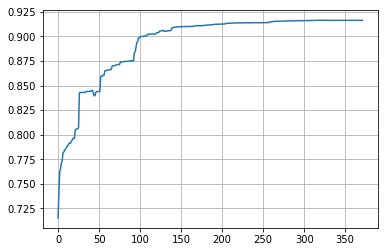

In [7]:
train_logs = xgb_model.evals_result()
pd.Series(train_logs['validation_0']['auc']).plot(grid=True);

In [5]:
''' Evaluation '''
test_y_pred = xgb_model.predict(X_test)
test_y_pred_proba = xgb_model.predict_proba(X_test)
class_report = common.eval_utils.class_report(
    y_true=y_test, 
    y_pred=test_y_pred,
    y_score=test_y_pred_proba)
print(class_report)

/home/raulsanchez/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


             precision    recall  f1-score   support      pred       AUC
0             0.992193  0.792231  0.881008  533068.0  425636.0  0.900254
1             0.167500  0.870231  0.280927   25607.0  133039.0  0.900254
avg / total   0.954393  0.795806  0.853503  558675.0  558675.0  0.900254


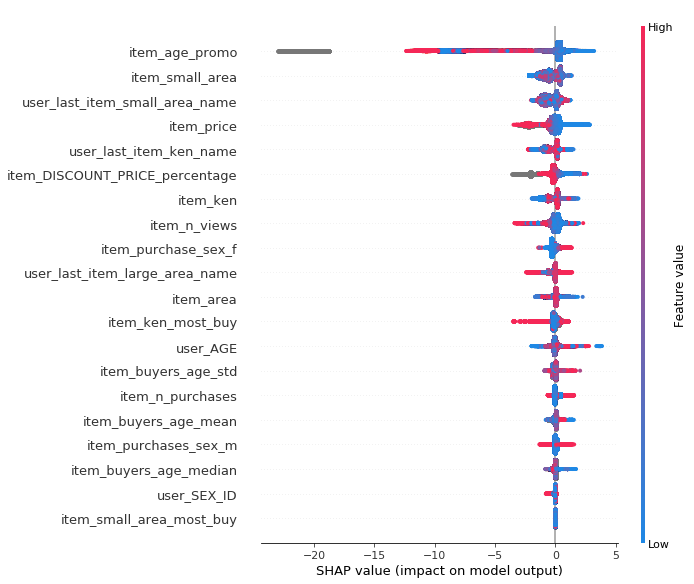

In [6]:
''' Feature Importance '''
shap_values = shap.TreeExplainer(xgb_model).shap_values(X_train)
shap.summary_plot(shap_values, X_train)